In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
mar20_df = pd.read_csv('JC-202003-citibike-tripdata.csv')
mar20_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,389,2020-03-01 00:14:07.0000,2020-03-01 00:20:36.0880,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,42381,Subscriber,1992,1
1,242,2020-03-01 00:48:06.4390,2020-03-01 00:52:08.9870,3185,City Hall,40.717733,-74.043845,3205,JC Medical Center,40.716540,-74.049638,42155,Subscriber,1991,1
2,124,2020-03-01 01:08:46.4880,2020-03-01 01:10:51.2780,3272,Jersey & 3rd,40.723332,-74.045953,3278,Monmouth and 6th,40.725685,-74.048790,42376,Subscriber,1987,0
3,104,2020-03-01 01:22:35.4790,2020-03-01 01:24:20.2470,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,42350,Subscriber,1993,1
4,228,2020-03-01 01:39:20.2680,2020-03-01 01:43:09.1380,3194,McGinley Square,40.725340,-74.067622,3280,Astor Place,40.719282,-74.071262,42235,Subscriber,1988,1


In [6]:
mar20_df.shape

(17719, 15)

In [7]:
mar20_df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
17714,296,2020-03-31 22:50:39.0410,2020-03-31 22:55:35.5980,3191,Union St,40.718211,-74.083639,3694,Jackson Square,40.711130,-74.078900,42145,Subscriber,1994,1
17715,147,2020-03-31 23:09:15.9690,2020-03-31 23:11:43.5310,3640,Journal Square,40.733670,-74.062500,3206,Hilltop,40.731169,-74.057574,42110,Subscriber,1991,1
17716,364,2020-03-31 23:17:02.0240,2020-03-31 23:23:06.8200,3195,Sip Ave,40.730897,-74.063913,3679,Bergen Ave,40.722104,-74.071455,42550,Subscriber,1986,1
17717,1217,2020-03-31 23:36:10.6430,2020-03-31 23:56:27.8120,3267,Morris Canal,40.712419,-74.038526,3276,Marin Light Rail,40.714584,-74.042817,42115,Subscriber,1986,1
17718,846,2020-03-31 23:37:21.1840,2020-03-31 23:51:28.1220,3195,Sip Ave,40.730897,-74.063913,3193,Lincoln Park,40.724605,-74.078406,42362,Subscriber,1965,1


In [8]:
mar20_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17719 entries, 0 to 17718
Data columns (total 15 columns):
tripduration               17719 non-null int64
starttime                  17719 non-null object
stoptime                   17719 non-null object
start station id           17719 non-null int64
start station name         17719 non-null object
start station latitude     17719 non-null float64
start station longitude    17719 non-null float64
end station id             17719 non-null int64
end station name           17719 non-null object
end station latitude       17719 non-null float64
end station longitude      17719 non-null float64
bikeid                     17719 non-null int64
usertype                   17719 non-null object
birth year                 17719 non-null int64
gender                     17719 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
from datetime import datetime

In [15]:
mar20_df['year'] = pd.DatetimeIndex(mar20_df['starttime']).year
mar20_df['month'] = pd.DatetimeIndex(mar20_df['starttime']).month
mar20_df['day'] = pd.DatetimeIndex(mar20_df['starttime']).day
mar20_df['hour'] = pd.DatetimeIndex(mar20_df['starttime']).hour
mar20_df['minute'] = pd.DatetimeIndex(mar20_df['starttime']).minute

In [16]:
mar20_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,month,day,hour,minute
0,389,2020-03-01 00:14:07.0000,2020-03-01 00:20:36.0880,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,42381,Subscriber,1992,1,2020,3,1,0,14
1,242,2020-03-01 00:48:06.4390,2020-03-01 00:52:08.9870,3185,City Hall,40.717733,-74.043845,3205,JC Medical Center,40.716540,-74.049638,42155,Subscriber,1991,1,2020,3,1,0,48
2,124,2020-03-01 01:08:46.4880,2020-03-01 01:10:51.2780,3272,Jersey & 3rd,40.723332,-74.045953,3278,Monmouth and 6th,40.725685,-74.048790,42376,Subscriber,1987,0,2020,3,1,1,8
3,104,2020-03-01 01:22:35.4790,2020-03-01 01:24:20.2470,3202,Newport PATH,40.727224,-74.033759,3638,Washington St,40.724294,-74.035483,42350,Subscriber,1993,1,2020,3,1,1,22
4,228,2020-03-01 01:39:20.2680,2020-03-01 01:43:09.1380,3194,McGinley Square,40.725340,-74.067622,3280,Astor Place,40.719282,-74.071262,42235,Subscriber,1988,1,2020,3,1,1,39


In [17]:
date = mar20_df['day'].values
month = mar20_df['month'].values
year = mar20_df['year'].values
hour = mar20_df['hour'].values
minute = mar20_df['minute'].values
station_start = mar20_df['start station id'].values
station_end = mar20_df['end station id'].values

In [44]:
weekday = np.zeros(len(date))
weekday[:] = np.nan
cnt = 0

for _year, _month, _date, _hour, _minute in zip(year, month, date, hour, minute):
    _dt = datetime(_year, _month, _date, _hour, _minute)
    _weekday = _dt.weekday()
    weekday[cnt] = _weekday
    cnt += 1
    
IsWeekday = weekday < 5
mar20_df['IsWeekday'] = IsWeekday

mar20_df['TimeSlice'] = (hour*3 + np.floor(minute/20)).astype(int)

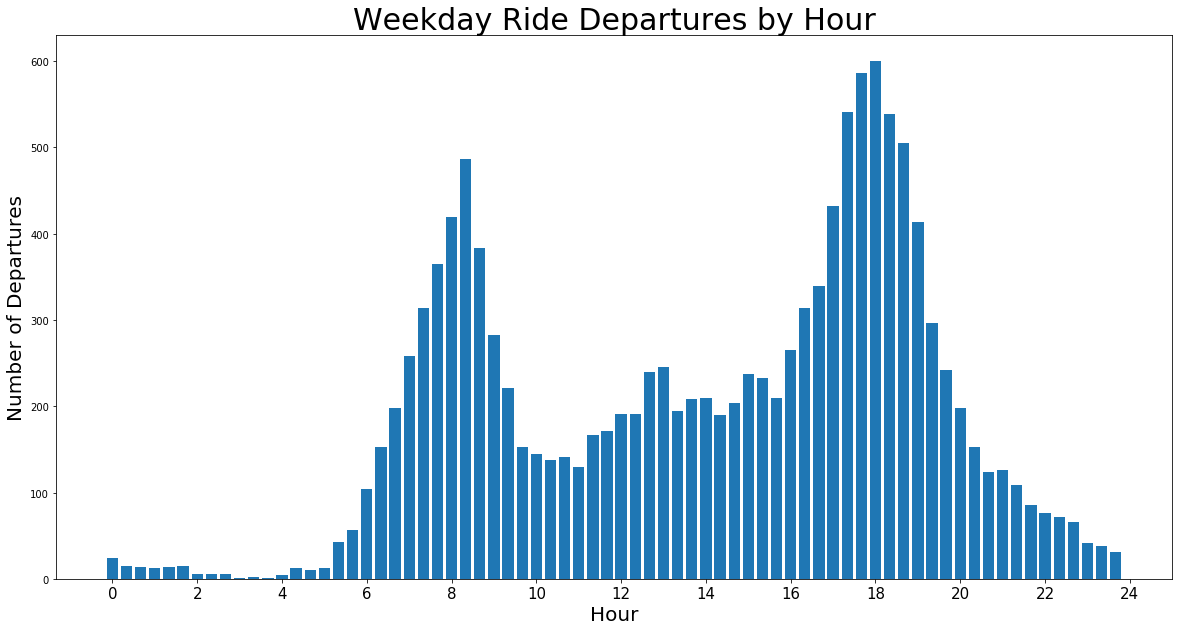

In [61]:
wkday_by_timeslice = mar20_df[mar20_df['IsWeekday']==True].groupby('TimeSlice').count().values[:,0]
plt.figure(figsize=(20,10))
plt.bar(range(0,72), wkday_by_timeslice)
plt.xlabel('Hour',fontsize=20)
plt.xticks(ticks=range(0,78,6),labels=list(range(0,26,2)),fontsize=15)
plt.ylabel('Number of Departures',fontsize=20)
plt.title('Weekday Ride Departures by Hour',fontsize=30)
plt.show()

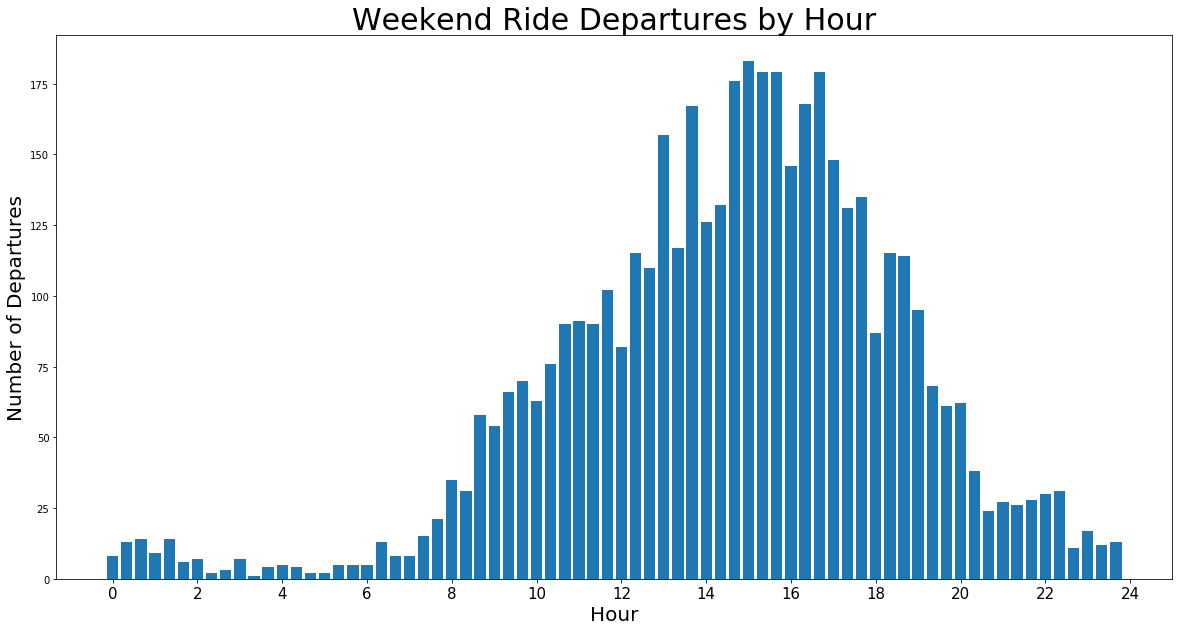

In [62]:
wknd_by_timeslice = mar20_df[mar20_df['IsWeekday']==False].groupby('TimeSlice').count().values[:,0]
plt.figure(figsize=(20,10))
plt.bar(range(0,72), wknd_by_timeslice)
plt.xlabel('Hour',fontsize=20)
plt.xticks(ticks=range(0,78,6),labels=list(range(0,26,2)),fontsize=15)
plt.ylabel('Number of Departures',fontsize=20)
plt.title('Weekend Ride Departures by Hour',fontsize=30)
plt.show()